In [1]:
from minio import Minio
import pandas as pd

# Timeframe giugno - settembre 2023 

In [3]:
START_DATE = "2023-06-01"
END_DATE = "2023-09-30"

# Parcheggi 

In [4]:
statistiche_parcheggi_molveno_df = pd.read_parquet("datasets/molveno/statistiche_parcheggi_molveno.parquet")
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df

Unnamed: 0,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
0,1.0,3.0,3.0,9.0,6.0,4.0,12.0,8.0,7.0,13.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,99.0,2022-07-27
1,1.0,4.0,5.0,4.0,10.0,14.0,35.0,23.0,22.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,156.0,2022-07-28
2,1.0,2.0,8.0,7.0,10.0,16.0,38.0,21.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,2022-07-29
3,5.0,15.0,21.0,23.0,35.0,22.0,107.0,83.0,85.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,2022-07-30
4,8.0,11.0,24.0,39.0,45.0,34.0,123.0,121.0,141.0,140.0,...,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1056.0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


### Visualize data within the specific timeframe

In [5]:
statistiche_parcheggi_molveno_timeframe_df = statistiche_parcheggi_molveno_df[
    (statistiche_parcheggi_molveno_df["date"] >= START_DATE) & 
    (statistiche_parcheggi_molveno_df["date"] <= END_DATE)
]

<Axes: xlabel='date'>

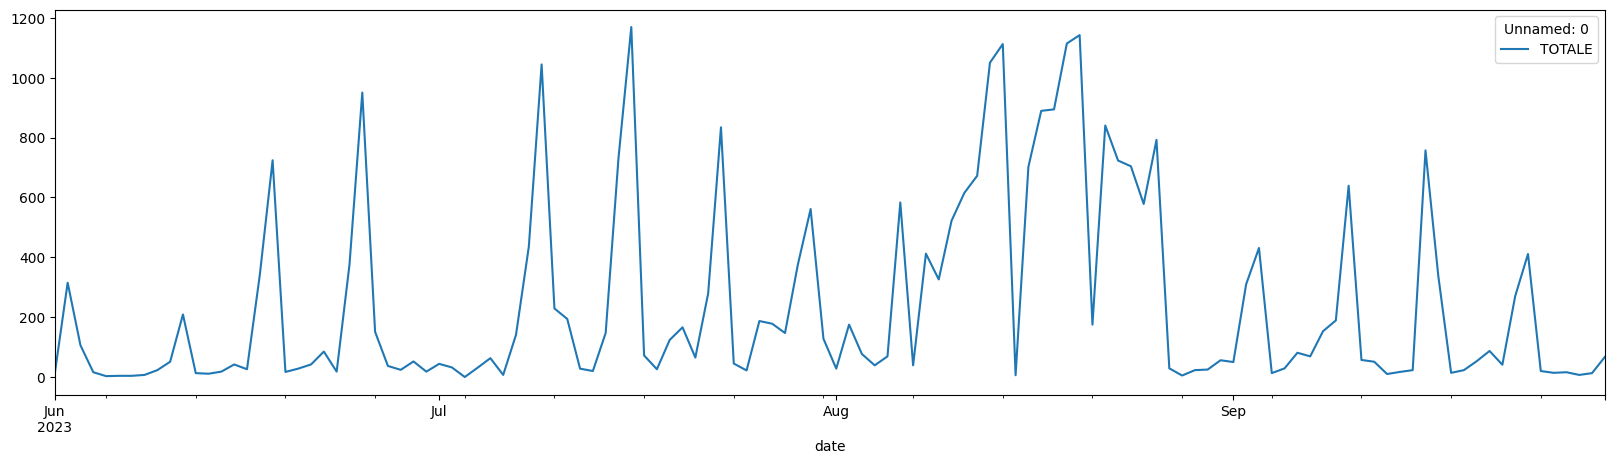

In [6]:
statistiche_parcheggi_molveno_timeframe_df.plot(y=["TOTALE"], x="date", figsize=(20,5))

# Dati Vodafone

## Vodafone Aree

In [7]:
aree_df = pd.read_parquet("datasets/vodafone/vodafone_aree.parquet")
aree_df

,locId,locName,locType,locDescr
0,22,provincia,AL_2,Trentino
1,100,apt,TN_MKT_AM_22,"San Martino Di Castrozza, Primiero e Vanoi"
2,101,apt,TN_MKT_AM_22,Valle di Non
3,102,apt,TN_MKT_AM_22,"Rovereto, Vallagarina e Monte Baldo"
4,103,apt,TN_MKT_AM_22,Valle di Fassa
...,...,...,...,...
148,LAGO_CAPR,poi,TN_MKT_POI,Lago dei Caprioli
149,MADO_CAMP,poi,TN_MKT_POI,Madonna di Campiglio
150,PINZ_REND,poi,TN_MKT_POI,Pinzolo e Rendena
151,STAZ_ROVE,poi,TN_MKT_POI,Stazione di Trento


<Axes: xlabel='locName'>

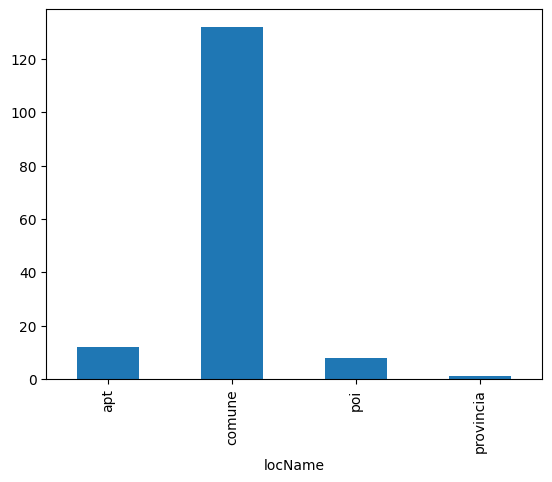

In [8]:
aree_df.groupby("locName")["locId"].count().plot(kind="bar")

## Vodafone Attendances

In [80]:
attendances_df = pd.read_parquet("datasets/vodafone/vodafone_attendences.parquet")
attendances_timeframe_df = attendances_df[
    (attendances_df["date"] >= START_DATE) &
    (attendances_df["date"] < END_DATE)
]
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0
...,...,...,...,...,...,...,...
237191,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,20
237192,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,160
237193,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0
237194,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,70


In [ ]:
attendances_timeframe_df["date"] = pd.to_datetime(attendances_timeframe_df["date"])
attendances_timeframe_df["year"] = attendances_timeframe_df["date"].dt.year
attendances_timeframe_df["month"] = attendances_timeframe_df["date"].dt.month
attendances_timeframe_df["day"] = attendances_timeframe_df["date"].dt.day

In [82]:
attendances_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
237191,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,20,2023,9,29
237192,2023-09-29,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,160,2023,9,29
237193,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,9,29
237194,2023-09-29,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,70,2023,9,29


In [83]:
attendances_timeframe_df.groupby(["date"])["value"].sum()

date
2023-06-01    231508
2023-06-02    227768
2023-06-03    261777
2023-06-04    247260
2023-06-05    231779
               ...  
2023-09-25    201140
2023-09-26    215672
2023-09-27    219892
2023-09-28    222399
2023-09-29    239090
Name: value, Length: 121, dtype: int64

In [84]:
test = attendances_timeframe_df.groupby(["date", "userProfile"])["value"].sum()
test

date        userProfile
2023-06-01  COMMUTER         1423
            TOURIST        149029
            VISITOR         81056
2023-06-02  COMMUTER          985
            TOURIST        151732
                            ...  
2023-09-28  TOURIST        150656
            VISITOR         70148
2023-09-29  COMMUTER         1732
            TOURIST        161544
            VISITOR         75814
Name: value, Length: 363, dtype: int64

<Axes: xlabel='date'>

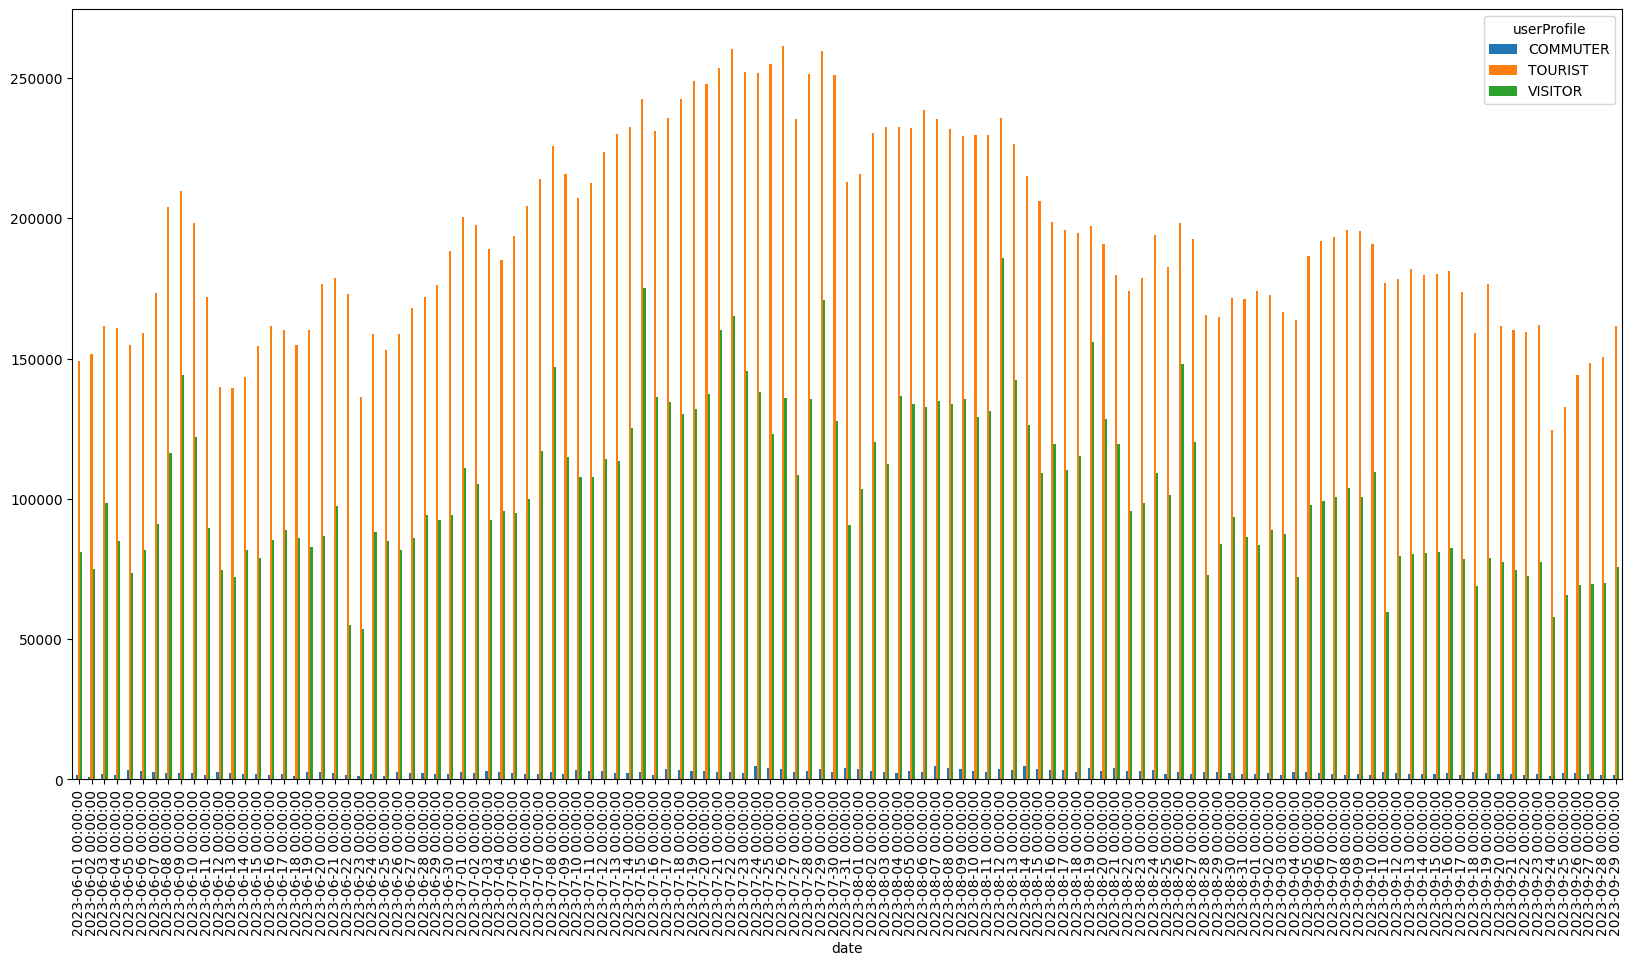

In [85]:
attendances_timeframe_df.groupby(["date", "userProfile"])["value"].sum().unstack().plot.bar(figsize=(20, 10))

## Vodafone Attendances stranieri

In [86]:
attendances_str_df = pd.read_parquet("datasets/vodafone/vodafone_attendences_STR.parquet")
attendances_str_df["date"] = pd.to_datetime(attendances_str_df["date"])
attendances_str_df["year"] = attendances_str_df["date"].dt.year
attendances_str_df["month"] = attendances_str_df["date"].dt.month
attendances_str_df["day"] = attendances_str_df["date"].dt.day
attendances_str_df.dtypes

date           datetime64[ns]
locType                object
locId                  object
userCountry            object
userProfile            object
userCluster            object
value                   int64
year                    int32
month                   int32
day                     int32
dtype: object

In [87]:
attendances_str_timeframe_df = attendances_str_df[
    (attendances_str_df["date"] >= START_DATE) &
    (attendances_str_df["date"] <= END_DATE)
]
attendances_str_timeframe_df

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
237572,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0,2023,9,30
237573,2023-09-30,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,90,2023,9,30
237574,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,9,30
237575,2023-09-30,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,69,2023,9,30


In [88]:
attendances_str_timeframe_df[attendances_str_timeframe_df["date"] == "2023-06-01"]

,date,locType,locId,userCountry,userProfile,userCluster,value,year,month,day
190181,2023-06-01,AL_2,22,STR,COMMUTER,STR,437,2023,6,1
190182,2023-06-01,AL_2,22,STR,TOURIST,STR,51089,2023,6,1
190183,2023-06-01,AL_2,22,STR,VISITOR,STR,26423,2023,6,1
190184,2023-06-01,TN_MKT_AL_3,104,STR,TOURIST,STR,0,2023,6,1
190185,2023-06-01,TN_MKT_AL_3,104,STR,VISITOR,STR,0,2023,6,1
...,...,...,...,...,...,...,...,...,...,...
190540,2023-06-01,TN_MKT_POI,STAZ_ROVE,STR,TOURIST,STR,0,2023,6,1
190541,2023-06-01,TN_MKT_POI,STAZ_ROVE,STR,VISITOR,STR,214,2023,6,1
190542,2023-06-01,TN_MKT_POI,STAZ_TREN,STR,COMMUTER,STR,0,2023,6,1
190543,2023-06-01,TN_MKT_POI,STAZ_TREN,STR,TOURIST,STR,61,2023,6,1


<Axes: xlabel='date'>

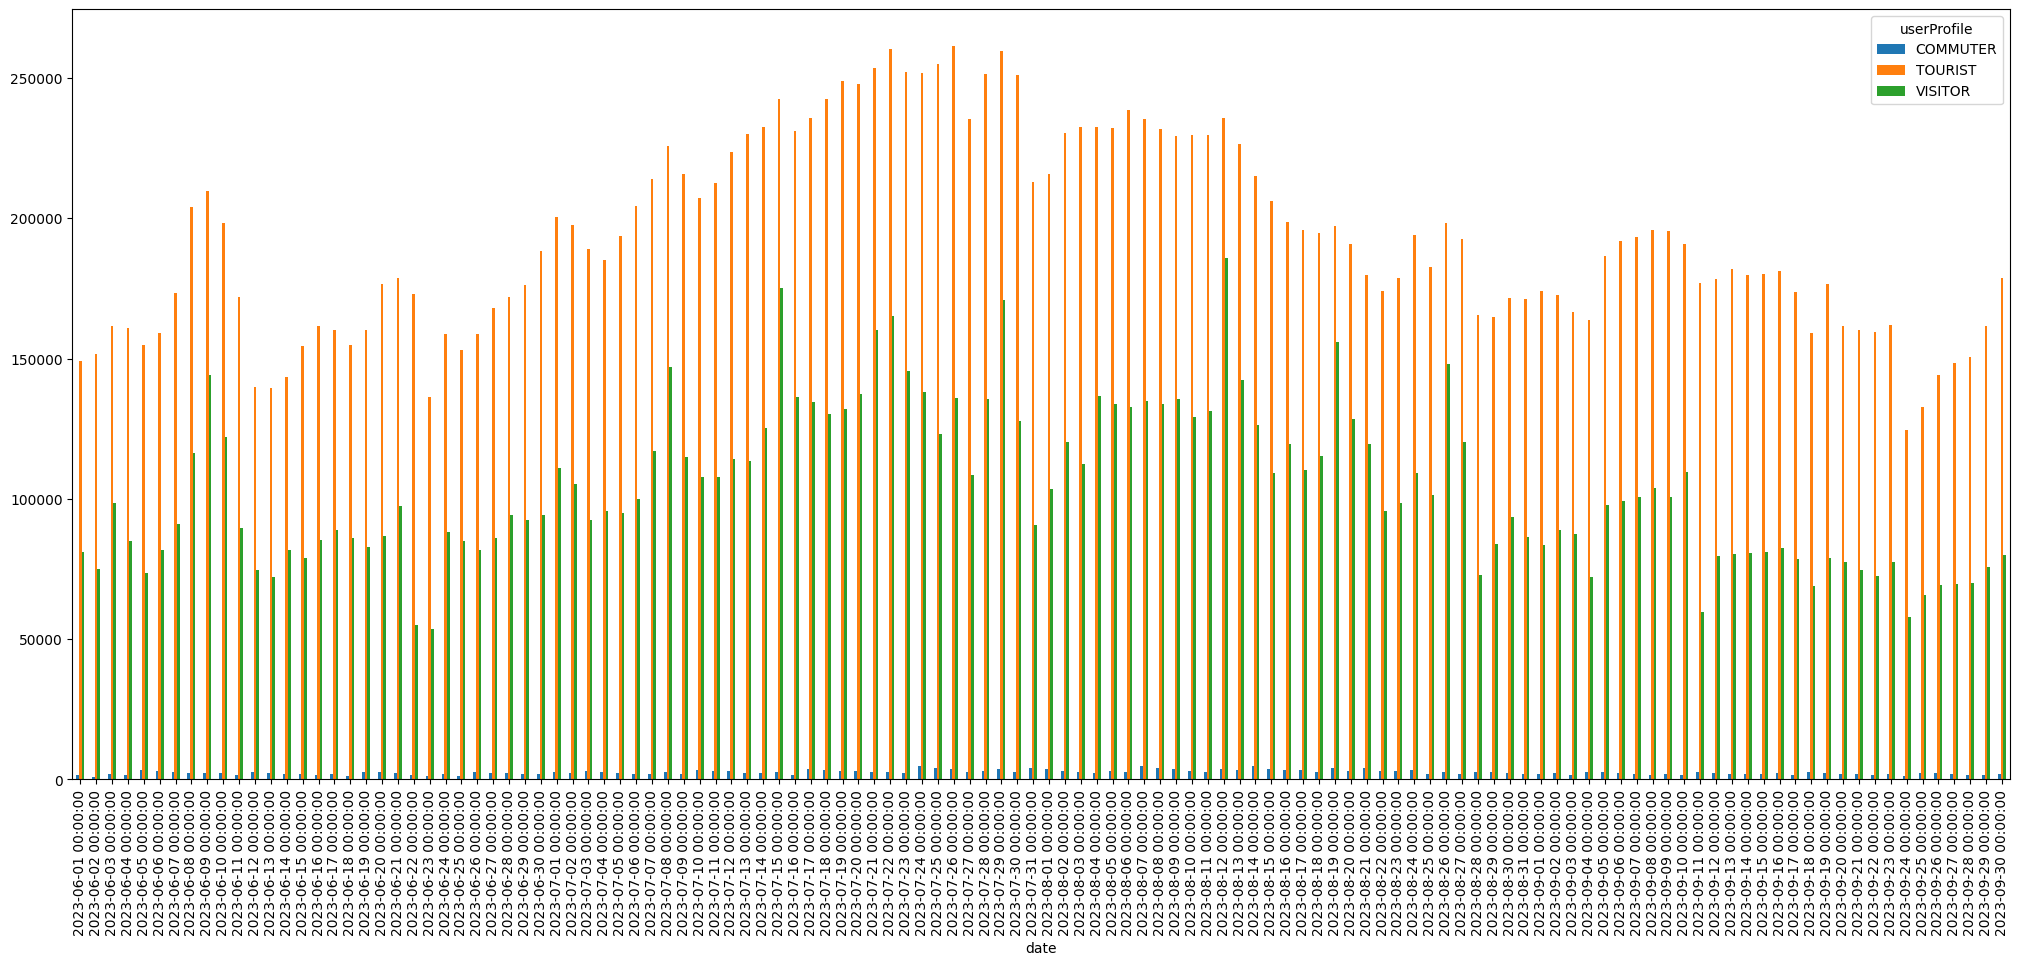

In [89]:
attendances_str_timeframe_df.groupby(["date", "userProfile"])["value"].sum().unstack().plot.bar(figsize=(25, 10))

# Contapersone passaggi

In [94]:
contapersone_passaggi_df = pd.read_parquet("datasets/molveno/contapersone_passaggi.parquet")
contapersone_passaggi_df = contapersone_passaggi_df[
    (contapersone_passaggi_df["data"] >= START_DATE) & 
    (contapersone_passaggi_df["data"] <= END_DATE)
]
contapersone_passaggi_df

,data,varco,presenze
0,2023-07-14,Varco 1,393
1,2023-07-14,Varco 2,91
2,2023-07-14,Varco 3,160
3,2023-07-14,Varco 4,70
4,2023-07-14,Varco 5,82
...,...,...,...
499,2023-09-07,Varco 5,207
500,2023-09-07,Varco 6,90
501,2023-09-07,Varco 7,196
502,2023-09-07,Varco 8,95


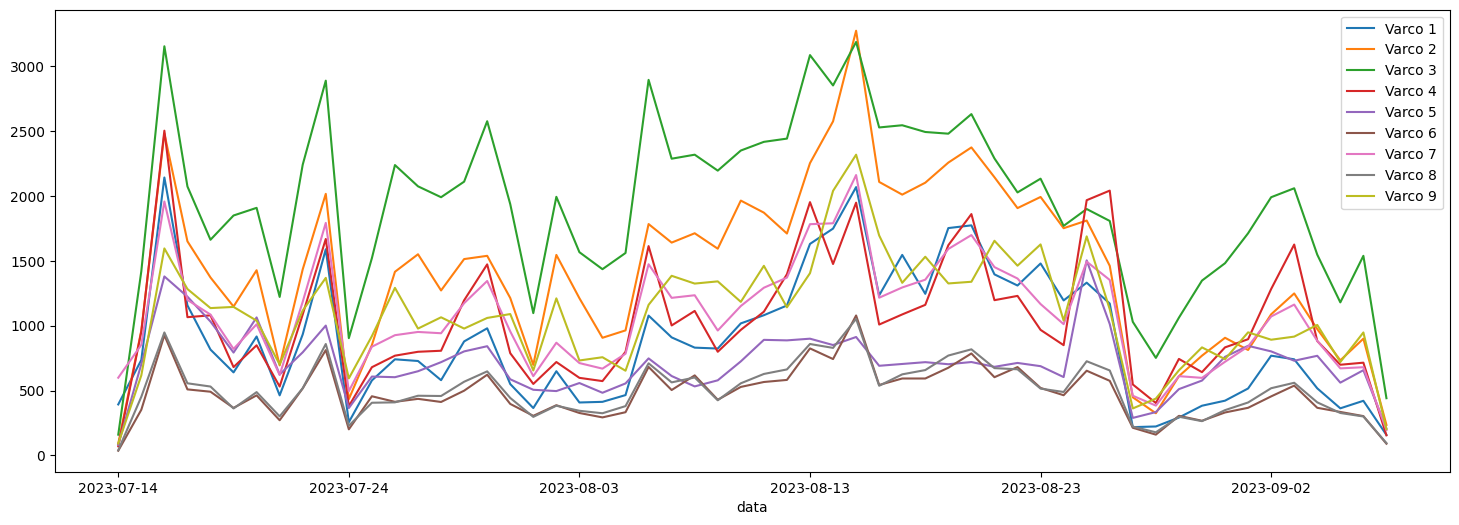

In [95]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_passaggi_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "data", y = "presenze", ax=ax, label=x.name)
contapersone_passaggi_df.groupby("varco").apply(g_plot)
plt.show()

## Contapersone presenze

In [96]:
contapersone_presenze_df = pd.read_parquet("datasets/molveno/contapersone_presenze.parquet")
contapersone_presenze_df

,data,varco,presenze
0,2023-07-15,Varco 1,183
1,2023-07-15,Varco 2,204
2,2023-07-15,Varco 3,304
3,2023-07-15,Varco 4,199
4,2023-07-15,Varco 5,117
...,...,...,...
625,2023-09-22,Varco 5,127
626,2023-09-22,Varco 6,77
627,2023-09-22,Varco 7,199
628,2023-09-22,Varco 8,73


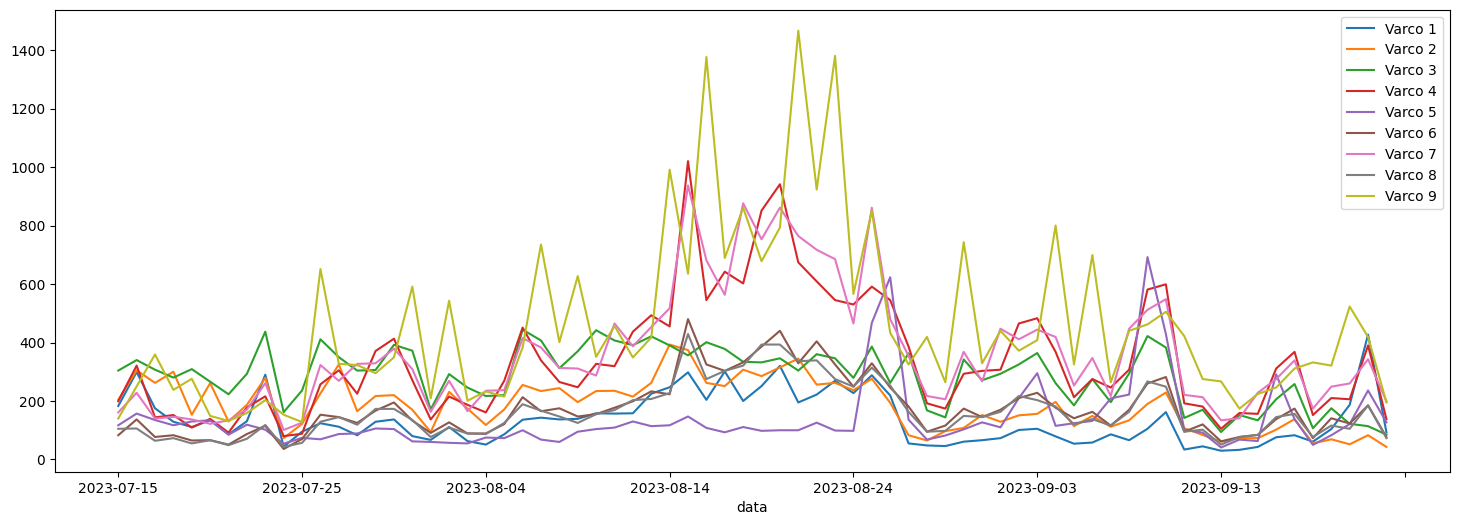

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
#contapersone_presenze_df.set_index("data").groupby("varco").plot( figsize=(15, 5), ax=plt.gca())
g_plot = lambda x:x.plot(x = "data", y = "presenze", ax=ax, label=x.name)
contapersone_presenze_df.groupby("varco").apply(g_plot)
plt.show()

## Contamezzi

### Contamezzi descrizione sensore

In [99]:
contamezzi_descrizione_sensore_df = pd.read_parquet("datasets/molveno/contamezzi_descrizione_sensore.parquet")
contamezzi_descrizione_sensore_df

,sensore,direzione,latitudine,longitudine,descrizione_direzione
0,M40,1,46.146086,10.972362,ENTRATA A MOLVENO da Andalo
1,M40,2,46.146086,10.972362,USCITA DA MOLVENO verso Andalo
2,M42,2,46.130443,10.968595,ENTRATA A MOLVENO da S. Lorenzo Dorsino
3,M42,1,46.130443,10.968595,USCITA DA MOLVENO verso S. Lorenzo Dorsino
4,M47,1,46.140916,10.963959,ENTRATA ALLA SPIAGGIA DI MOLVENO
5,M47,2,46.140916,10.963959,USCITA DALLA SPIAGGIA DI MOLVENO


### Contamezzi Molveno

In [102]:
contamezzi_df = pd.read_parquet("datasets/molveno/contamezzi.parquet")

sensore  direzione
M40      1            Axes(0.125,0.11;0.775x0.77)
         2            Axes(0.125,0.11;0.775x0.77)
M42      1            Axes(0.125,0.11;0.775x0.77)
         2            Axes(0.125,0.11;0.775x0.77)
M47      1            Axes(0.125,0.11;0.775x0.77)
         2            Axes(0.125,0.11;0.775x0.77)
dtype: object

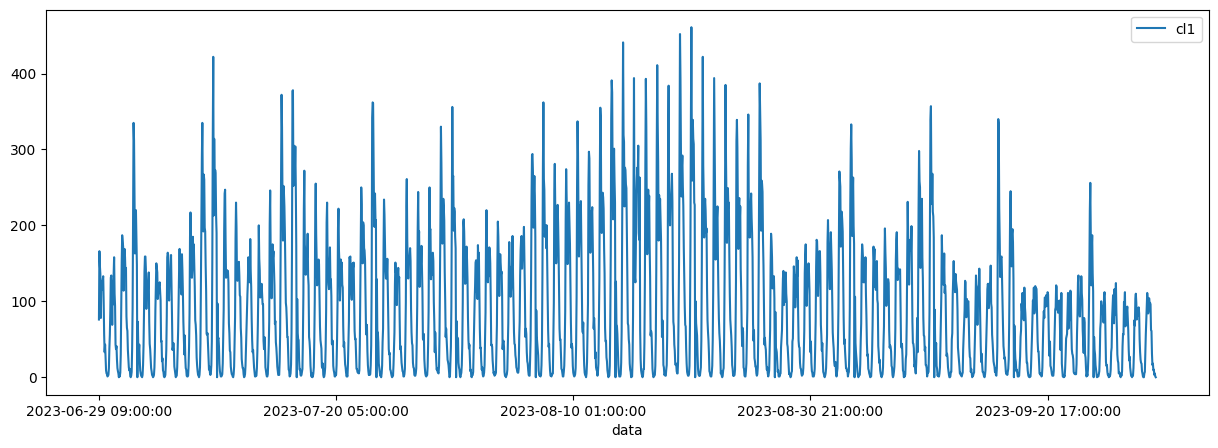

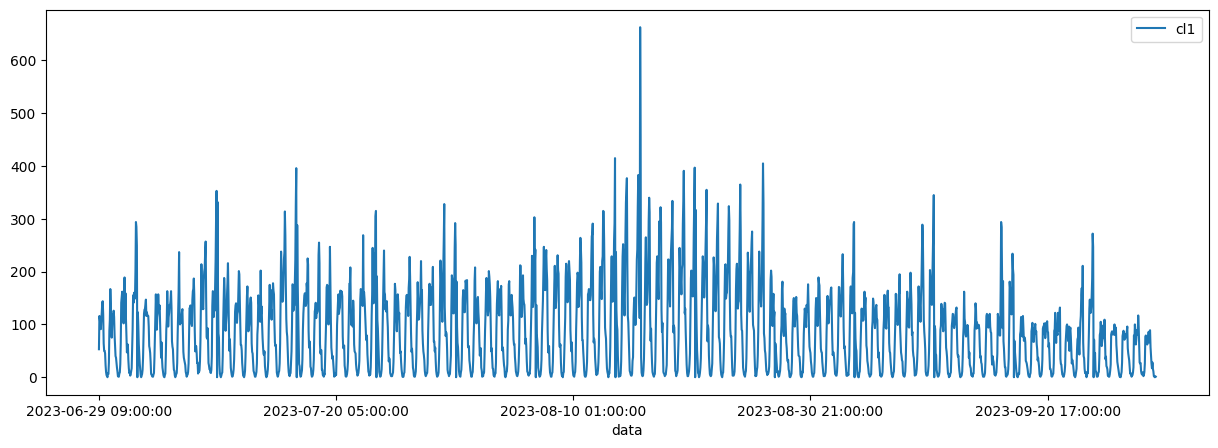

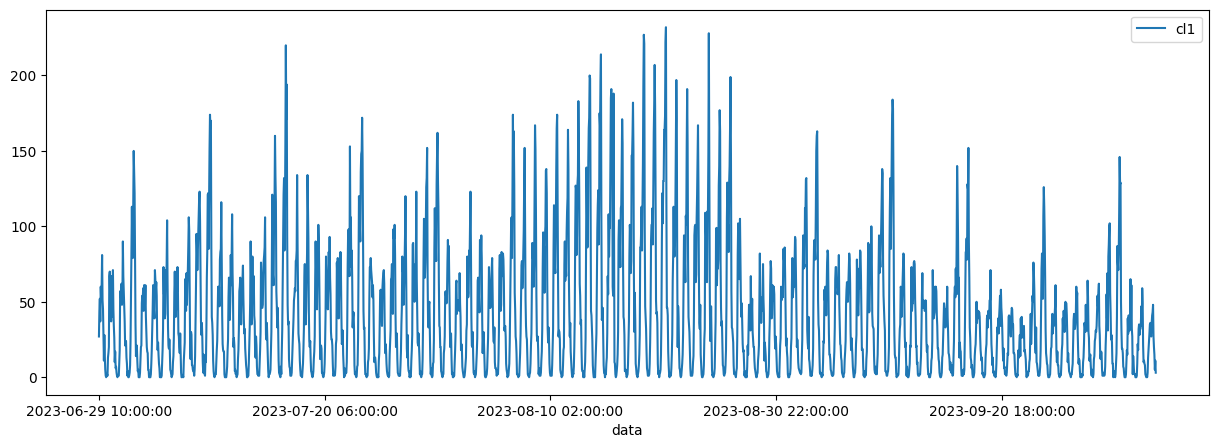

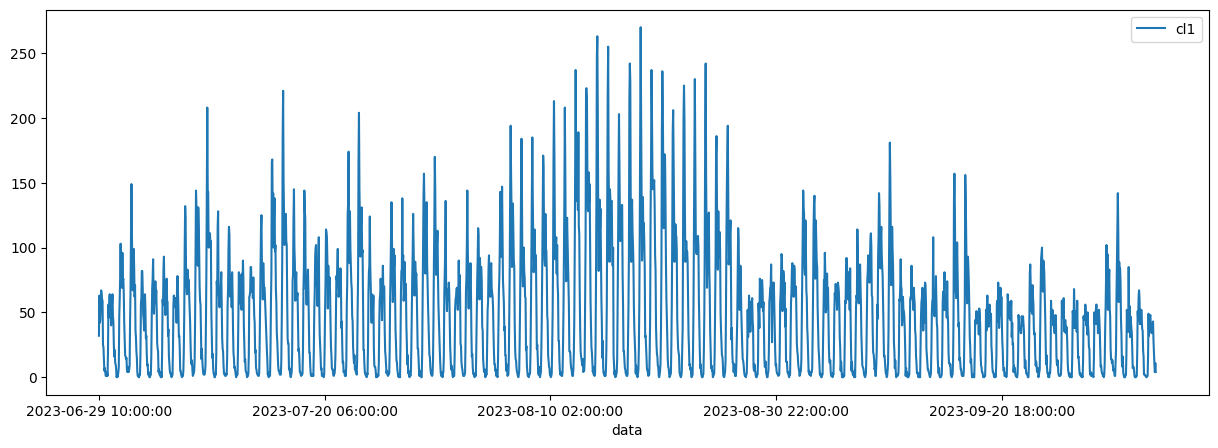

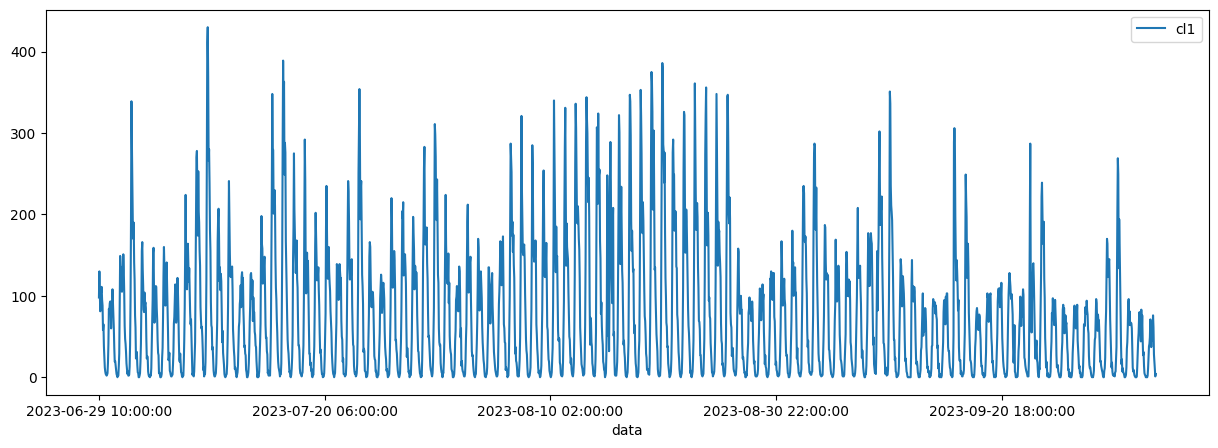

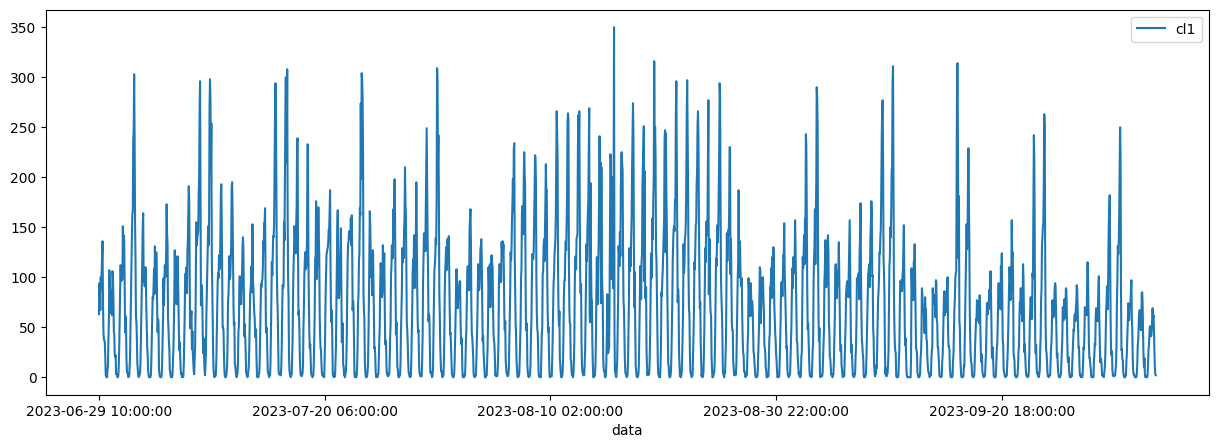

In [103]:
contamezzi_df.groupby(["sensore", "direzione"])[["cl1", "data"]].plot(x="data", figsize=(15, 5))

## Summarize the presenze of cars